In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crime Stats Dataframe

In [370]:
#path="C:\Users\andre\Documents\Msc of Data Science\Data 601\Project Gruop\Community_Crime_Statistics_20250118.csv"
crime_file="Community_Crime_Statistics_20250118.csv"
crime_df=pd.read_csv(crime_file)
crime_df.head(5)

Community                    Category  Crime Count  Year  Month
0       01B      Assault (Non-domestic)            1  2022     11
1       01B  Break & Enter - Commercial            1  2019      6
2       01B  Break & Enter - Commercial            1  2019      8
3       01B  Break & Enter - Commercial            2  2020      3
4       01B  Break & Enter - Commercial            2  2020      7

In [372]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75595 entries, 0 to 75594
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    75595 non-null  object
 1   Category     75595 non-null  object
 2   Crime Count  75595 non-null  int64 
 3   Year         75595 non-null  int64 
 4   Month        75595 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [374]:
#How many communities has crime records?
Community_name=crime_df['Community'].dropna().unique()
Total_Community_name=len(Community_name)
print("Total communities:",Total_Community_name)

#Recognizing the communities 
display(Community_name)

Total communities: 300


array(['01B', '01F', '01I', '01K', '02B', '02C', '02E', '02F', '02K',
       '02L', '03W', '05D', '05F', '06A', '06B', '06C', '09H', '09K',
       '09O', '09P', '09Q', '10D', '10E', '12A', '12B', '12C', '12I',
       '12J', '12K', '12L', '13A', '13C', '13E', '13F', '13G', '13M',
       'ABBEYDALE', 'ACADIA', 'ALBERT PARK/RADISSON HEIGHTS',
       'ALPINE PARK', 'ALTADORE', 'ALYTH/BONNYBROOK', 'AMBLETON',
       'APPLEWOOD PARK', 'ARBOUR LAKE', 'ASPEN WOODS', 'AUBURN BAY',
       'AURORA BUSINESS PARK', 'BANFF TRAIL', 'BANKVIEW', 'BAYVIEW',
       'BEDDINGTON HEIGHTS', 'BEL-AIRE', 'BELMONT', 'BELTLINE',
       'BELVEDERE', 'BONAVISTA DOWNS', 'BOWNESS', 'BRAESIDE', 'BRENTWOOD',
       'BRIDGELAND/RIVERSIDE', 'BRIDLEWOOD', 'BRITANNIA',
       'BURNS INDUSTRIAL', 'CALGARY INTERNATIONAL AIRPORT',
       'CAMBRIAN HEIGHTS', 'CANADA OLYMPIC PARK', 'CANYON MEADOWS',
       'CAPITOL HILL', 'CARRINGTON', 'CASTLERIDGE', 'CEDARBRAE',
       'CHAPARRAL', 'CHARLESWOOD', 'CHINATOWN', 'CHINOOK PARK',


In [308]:
#How many crime categories has this data set?
Crime_cat=crime_df['Category'].dropna().unique()
Total_Crime_cat=len(Crime_cat)
print("Total crime categories:",Total_Crime_cat)

#Recognizing the crime categories
print("These are the crime categories whithin the dataset:\n")
display(Crime_cat)



Total crime categories: 9
These are the crime categories whithin the dataset:



array(['Assault (Non-domestic)', 'Break & Enter - Commercial',
       'Break & Enter - Dwelling', 'Theft FROM Vehicle',
       'Theft OF Vehicle', "Violence\xa0 'Other' (Non-domestic)",
       'Street Robbery', 'Commercial Robbery',
       'Break & Enter - Other Premises'], dtype=object)

In [376]:
#Does the datframe have invalid values in the Month and Year Columns?
Year_values=np.sort(crime_df['Year'].dropna().unique())
print("These are the years reported in the database:", Year_values)

Month_Values=np.sort(crime_df['Month'].dropna().unique())
print("These are the months reported in the database:", Month_Values)

if np.all((Month_Values>0) & (Month_Values<13)):
    print("All month entries are valid")
else:
    ("There are invalid entries, please correct the data")



These are the years reported in the database: [2018 2019 2020 2021 2022 2023 2024]
These are the months reported in the database: [ 1  2  3  4  5  6  7  8  9 10 11 12]
All month entries are valid


In [378]:
#Do we have crime records with missing values?

print("Missing values:\n")
crime_df.isna().sum()

Missing values:



Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

## Data Transformation
*With the previous findings, a crime category will be renamed.

*The number of entries relate to residual communities will be checked to see if we exclude those from the analysis.

*A regex validations mas be done with the community names.

*Range of dates must be reviewed: is the timeline consistent?

### 1. Change name of Crime Category 

In [383]:
#Changing name category
crime_df['Category']=crime_df['Category'].replace("Violence\xa0 'Other' (Non-domestic)","Violence (Non-domestic)")
crime_df.tail(3)

Community                 Category  Crime Count  Year  Month
75592  CORNERSTONE  Violence (Non-domestic)            1  2023      2
75593  CORNERSTONE  Violence (Non-domestic)            1  2023      7
75594  CORNERSTONE  Violence (Non-domestic)            1  2023     12

### 2. Do we need all the data?

In [386]:
#Since we want to verify the impact of residual communities, we are adding a new column to categorize the communities
crime_df['Community Type'] = np.where(crime_df['Community'].str[0].str.isdigit(), 'Residual', 'City')
display(crime_df.head(2), crime_df.tail(2))

#Now, we will calculate a general crime percentage
count_crime=crime_df['Crime Count'].sum()
print("Total crime events in the dataset:",count_crime)

crime_residual = crime_df[crime_df['Community Type'] == 'Residual']['Crime Count'].sum()
print("Total crime events ocurred in residual communities:",crime_residual)

#I want to double check the total entries of resisudal communities in the daframe
count_residual = crime_df[crime_df['Community Type'] == 'Residual']['Community Type'].count()
print("Total entries of crime in residual communities:",count_residual)

perc_residual=round((crime_residual/count_crime)*100,4)
print("Crimes in res. communities represents only:", perc_residual,"% - in the last 5 years") # I think we can exclude this areas from the analysis


Community                    Category  Crime Count  Year  Month  \
0       01B      Assault (Non-domestic)            1  2022     11   
1       01B  Break & Enter - Commercial            1  2019      6   

  Community Type  
0       Residual  
1       Residual

Community                 Category  Crime Count  Year  Month  \
75593  CORNERSTONE  Violence (Non-domestic)            1  2023      7   
75594  CORNERSTONE  Violence (Non-domestic)            1  2023     12   

      Community Type  
75593           City  
75594           City

Total crime events in the dataset: 212950
Total crime events ocurred in residual communities: 1653
Total entries of crime in residual communities: 1013
Crimes in res. communities represents only: 0.7762 % - in the last 5 years


### 3. Exclude Residual Communities from the Data Set

In [414]:
original_len=len(crime_df)
new_len=(original_len)-(count_residual)
crime_dfc=crime_df[crime_df['Community Type'] != 'Residual']
crime_dfc= crime_dfc.reset_index(drop=True)   #Added to avoid issues when printing just the head
print("Since entries from residual coomunities are:", count_residual, "the new dataframe should have", new_len, "entries")
crime_dfc.info()

# Community Type will be excluded, since it does not prodive valuable info
crime_dfc=crime_dfc.drop('Community Type',axis=1)
display(crime_dfc.head(3))

Since entries from residual coomunities are: 1013 the new dataframe should have 74582 entries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74582 entries, 0 to 74581
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Community       74582 non-null  object
 1   Category        74582 non-null  object
 2   Crime Count     74582 non-null  int64 
 3   Year            74582 non-null  int64 
 4   Month           74582 non-null  int64 
 5   Community Type  74582 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


Community                Category  Crime Count  Year  Month
0  ABBEYDALE  Assault (Non-domestic)            1  2018      1
1  ABBEYDALE  Assault (Non-domestic)            1  2018      2
2  ABBEYDALE  Assault (Non-domestic)            1  2018      3

# Date Ranges validation Crime df - avoid bias and missleading trends
In order to present accurate values when processing the data, for example: monthly averages, we will add missing months to the original data set, in this case, if a crime occurs in a Community just 6 times during 2 months, we cannot say that the montly averaged of crimes is 6, because in the rest of the year there were not crimes reported. Additionally, when working with time series, it is recommende to consider all the periods, this will also help us to do not overestimate the monthly crime averages in Calgary.

In [565]:
# Create a complete range of months for each combination of Community, Category, and Year
#This is an example of how the cartesian product can be applied - the theory was explained in a class of this course

months_df = pd.MultiIndex.from_product(
    [crime_dfc["Community"].unique(), crime_dfc["Category"].unique(), crime_dfc["Year"].unique(), range(1, 13)],
    names=["Community", "Category", "Year", "Month"]
).to_frame(index=False)

# Merge with the existing data
crime_dfc = months_df.merge(crime_dfc, on=["Community", "Category", "Year", "Month"], how="left")

# Fill missing crime counts with 0
crime_dfc["Crime Count"] = crime_dfc["Crime Count"].fillna(0).astype(int)

#Since the original dataset has record up Oct 2024, we will delete nov and dec of 2024
#Same as before, in the same way we did not want to over estimate, we do not want to underestimate
crime_dfc=crime_dfc[~((crime_dfc['Year']==2024))]
display(crime_dfc.head(3))

Community                Category  Year  Month  Crime Count
0  ABBEYDALE  Assault (Non-domestic)  2018      1            1
1  ABBEYDALE  Assault (Non-domestic)  2018      2            1
2  ABBEYDALE  Assault (Non-domestic)  2018      3            1

# Social Disorders Dataframe

In [394]:
#path="C:\Users\andre\Documents\Msc of Data Science\Data 601\Project Gruop\Community_Crime_Statistics_20250118.csv"
disorder_File="Community_Disorder_Statistics_20250204.csv"
disorder_df=pd.read_csv(disorder_File)
disorder_df.head(3)

Community  Category  Event Count  Year  Month
0       01B  Disorder            1  2018      2
1       01B  Disorder            2  2018      6
2       01B  Disorder            1  2018      8

In [319]:
disorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21445 entries, 0 to 21444
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    21445 non-null  object
 1   Category     21445 non-null  object
 2   Event Count  21445 non-null  int64 
 3   Year         21445 non-null  int64 
 4   Month        21445 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 837.8+ KB


In [396]:
#How many communities has social disorder records?
Community_name_disorder=disorder_df['Community'].dropna().unique()
Total_Community_name_disorder=len(Community_name_disorder)
print("Total communities:",Total_Community_name_disorder)

#Recognizing the communities 
display(Community_name_disorder)

Total communities: 306


array(['01B', '01F', '01I', '01K', '02B', '02C', '02E', '02F', '02K',
       '02L', '03W', '05D', '05F', '05G', '06A', '06B', '06C', '09D',
       '09H', '09K', '09O', '09P', '09Q', '10D', '10E', '12A', '12B',
       '12C', '12I', '12J', '12K', '12L', '13A', '13C', '13E', '13F',
       '13G', '13H', '13M', 'ABBEYDALE', 'ACADIA',
       'ALBERT PARK/RADISSON HEIGHTS', 'ALPINE PARK', 'ALTADORE',
       'ALYTH/BONNYBROOK', 'AMBLETON', 'APPLEWOOD PARK', 'ARBOUR LAKE',
       'ASPEN WOODS', 'AUBURN BAY', 'AURORA BUSINESS PARK', 'BANFF TRAIL',
       'BANKVIEW', 'BAYVIEW', 'BEDDINGTON HEIGHTS', 'BEL-AIRE', 'BELMONT',
       'BELTLINE', 'BELVEDERE', 'BONAVISTA DOWNS', 'BOWNESS', 'BRAESIDE',
       'BRENTWOOD', 'BRIDGELAND/RIVERSIDE', 'BRIDLEWOOD', 'BRITANNIA',
       'BURNS INDUSTRIAL', 'CALGARY INTERNATIONAL AIRPORT',
       'CAMBRIAN HEIGHTS', 'CANADA OLYMPIC PARK', 'CANYON MEADOWS',
       'CAPITOL HILL', 'CARRINGTON', 'CASTLERIDGE', 'CEDARBRAE',
       'CHAPARRAL', 'CHARLESWOOD', 'CHINATO

In [398]:
#How many social disorder categories has this data set?
Disorder_cat=disorder_df['Category'].dropna().unique()
Total_Disorder_cat=len(Disorder_cat)
print("Total crime categories:",Total_Disorder_cat)

#Recognizing the social disorder categories
print("These are the crime categories whithin the dataset:", Disorder_cat)

Total crime categories: 1
These are the crime categories whithin the dataset: ['Disorder']


In [400]:
#Does the datframe have invalid values in the Month and Year Columns?
Year_values=np.sort(disorder_df['Year'].dropna().unique())
print("These are the years reported in the database:", Year_values)

Month_Values=np.sort(disorder_df['Month'].dropna().unique())
print("These are the months reported in the database:", Month_Values)

if np.all((Month_Values>0) & (Month_Values<13)):
    print("All month entries are valid")
else:
    ("There are invalid entries, please correct the data")


These are the years reported in the database: [2018 2019 2020 2021 2022 2023 2024]
These are the months reported in the database: [ 1  2  3  4  5  6  7  8  9 10 11 12]
All month entries are valid


In [402]:
#Do we have crime records with missing values?

print("Missing values:\n")
disorder_df.isna().sum()

Missing values:



Community      0
Category       0
Event Count    0
Year           0
Month          0
dtype: int64

## Data Transformation

*The number of entries relate to residual communities will be checked to see if we exclude those from the analysis.

*A regex validations mas be done with the community names.

*Review data timeline


### 2. Do we need all the data?

In [406]:
#Since we want to verify the impact of residual communities, we are adding a new column to categorize the communities
disorder_df['Community Type'] = np.where(disorder_df['Community'].str[0].str.isdigit(), 'Residual', 'City')
display(disorder_df.head(3), disorder_df.tail(3))

#Now, we will calculate a general crime percentage
count_disorder=disorder_df['Event Count'].sum()
print("Total disorder events in the dataset:",count_disorder)

disorder_residual = disorder_df[disorder_df['Community Type'] == 'Residual']['Event Count'].sum()
print("Total disorder events ocurred in residual communities:",disorder_residual)

#I want to double check the total entries of resisudal communities in the daframe
count_residual_disorder = disorder_df[disorder_df['Community Type'] == 'Residual']['Community Type'].count()
print("Total entries of disorder events in residual communities:",count_residual_disorder)

perc_residual_disorder=round((disorder_residual/count_disorder)*100,4)
print("Disorder eventes in res. communities represents only:\n", perc_residual_disorder,"% - in the last 5 years") # I think we can exclude this areas from the analysis

Community  Category  Event Count  Year  Month Community Type
0       01B  Disorder            1  2018      2       Residual
1       01B  Disorder            2  2018      6       Residual
2       01B  Disorder            1  2018      8       Residual

Community  Category  Event Count  Year  Month Community Type
21442  LEWISBURG  Disorder            1  2024      4           City
21443  LEWISBURG  Disorder            1  2024     10           City
21444        13J  Disorder            1  2023      9       Residual

Total disorder events in the dataset: 596667
Total disorder events ocurred in residual communities: 2151
Total entries of disorder events in residual communities: 1073
Disorder eventes in res. communities represents only:
 0.3605 % - in the last 5 years


### 3. Exclude Residual Communities from the Data Set

In [549]:
original_len_disorder=len(disorder_df)
new_len_disorder=(original_len_disorder)-(count_residual_disorder)
disorder_dfc=disorder_df[disorder_df['Community Type'] != 'Residual']
disorder_dfc = disorder_dfc.reset_index(drop=True)   #Added to avoid issues when printing just the first rows
print("Since entries from residual coomunities are:", count_residual_disorder, "the new dataframe should have", new_len_disorder, "entries")
disorder_dfc.info()

# Community Type will be excluded, since it does not prodive valuable info
disorder_dfc=disorder_dfc.drop('Community Type', axis=1)

Since entries from residual coomunities are: 1073 the new dataframe should have 20372 entries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20372 entries, 0 to 20371
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Community       20372 non-null  object
 1   Category        20372 non-null  object
 2   Event Count     20372 non-null  int64 
 3   Year            20372 non-null  int64 
 4   Month           20372 non-null  int64 
 5   Community Type  20372 non-null  object
dtypes: int64(3), object(3)
memory usage: 955.1+ KB


# Date Ranges validation Crime df - avoid bias and missleading trends

In [553]:
# We cannot reuse the complete range of months that was created before, because the categories of crimes
#are different between the 2 mains data sets.
months_df = pd.MultiIndex.from_product(
    [disorder_dfc["Community"].unique(), disorder_dfc["Category"].unique(), disorder_dfc["Year"].unique(), range(1, 13)],
    names=["Community", "Category", "Year", "Month"]
).to_frame(index=False)

# Merge with the existing data
disorder_dfc = months_df.merge(disorder_dfc, on=["Community", "Category", "Year", "Month"], how="left")

# Fill missing crime counts with 0
disorder_dfc["Event Count"] = disorder_dfc["Event Count"].fillna(0).astype(int)

#Since the original dataset has record up Oct 2024, we will delete nov and dec of 2024
#Same as before, in the same way we did not want to over estimate, we do not want to underestimate
disorder_dfc=disorder_dfc[~((disorder_dfc['Year']==2024))]
display(disorder_dfc.head(3))

Community  Category  Year  Month  Event Count
0  ABBEYDALE  Disorder  2018      1           22
1  ABBEYDALE  Disorder  2018      2           16
2  ABBEYDALE  Disorder  2018      3           22

In [567]:
#New column to be used as key when merging: Year, Month, Community
# Defining the conversion dictionary
disorder_dfc = pd.DataFrame(disorder_dfc)
convert_dict = {'Year': str, 'Month': str}

# Converting columns using the dictionary
disorder_dfc = disorder_dfc.astype(convert_dict)

#Adding the new column - It will be the identifier or key for merging
disorder_dfc['Date - Community']=disorder_dfc["Month"]+'/'+ disorder_dfc["Year"]+' - '+disorder_dfc["Community"]   

#Rename column and delete others to avoid duplicate columns when merging
#disorder_dfc.rename(columns={'Event Count':'Disorder Events'},inplace=True)
#disorder_dfc=disorder_dfc.drop(['Year','Month', 'Community','Category'], axis=1)
display(disorder_dfc.head(3))

Community  Category  Year Month  Event Count    Date - Community
0  ABBEYDALE  Disorder  2018     1           22  1/2018 - ABBEYDALE
1  ABBEYDALE  Disorder  2018     2           16  2/2018 - ABBEYDALE
2  ABBEYDALE  Disorder  2018     3           22  3/2018 - ABBEYDALE

# Merge the 2 dataframe
We want to merge the data frames to make it easier the analysys. Since in the crime statistics dataframe, has multiple entries for every date (mm-yyyy), we will generate different data sub sets to be merged with the social disorder data frames.

In order to merge the data set we need a common column, so a new column with month, year and community will be created.

## General data frame consolidation - Crime df


In [569]:
#Since we want to merge this dataframe with social disorder df
#Consolidated df with the average of total crimes per month over the last 5 years for Calgary
crime_dfc_total=crime_dfc.groupby(['Year', 'Month'])['Crime Count'].sum()
crime_dfc_total=crime_dfc_total.groupby('Month').mean()
crime_dfc_total=crime_dfc_total.reset_index()

#Consolidated df with the average of montly crimes over the last 5 years for each community
crime_dfc_total_community=crime_dfc.groupby(['Community'])['Crime Count'].mean()
crime_dfc_total_community=crime_dfc_total_community.reset_index()

# Define the conversion dictionary
crime_dfc_tomerge = pd.DataFrame(crime_dfc)
convert_dict = {'Year': str, 'Month': str}

# Convert columns using the dictionary
crime_dfc_tomerge = crime_dfc_tomerge.astype(convert_dict)

#Adding the new column in Crime df - It will be the identifier or key for merging
crime_dfc_tomerge['Date - Community']=crime_dfc_tomerge["Month"]+'/'+ crime_dfc_tomerge["Year"]+' - '+crime_dfc_tomerge["Community"]   

display(crime_dfc_total.head(3))
display(crime_dfc_total_community.head(10))
display(crime_dfc_tomerge.head(3))

Month  Crime Count
0      1  2739.166667
1      2  2352.833333
2      3  2673.000000

Community  Crime Count
0                     ABBEYDALE     1.043210
1                        ACADIA     2.893519
2  ALBERT PARK/RADISSON HEIGHTS     2.998457
3                   ALPINE PARK     0.015432
4                      ALTADORE     1.577160
5              ALYTH/BONNYBROOK     0.862654
6                      AMBLETON     0.007716
7                APPLEWOOD PARK     1.037037
8                   ARBOUR LAKE     2.016975
9                   ASPEN WOODS     0.796296

Community                Category  Year Month  Crime Count  \
0  ABBEYDALE  Assault (Non-domestic)  2018     1            1   
1  ABBEYDALE  Assault (Non-domestic)  2018     2            1   
2  ABBEYDALE  Assault (Non-domestic)  2018     3            1   

     Date - Community  
0  1/2018 - ABBEYDALE  
1  2/2018 - ABBEYDALE  
2  3/2018 - ABBEYDALE

## Subset consolidation - Crime df
The different crime categories will be grouped in bigger categories, this will reduce the total subsets generated. The crimes categories will be grouped considering their nature, as follows:

1. **Violent Crime**: Assault (Non-domestic) and Violence (Non-domestic)
2. **Property Crime**: Break & Enter - Commercial, Break & Enter - Dwelling and Break & Enter - Other Premises
3. **Theft**: Theft FROM Vehicle and Theft OF Vehicle
4. **Robbery**: Street Robbery and Commercial Robbery.

### Subset Violent Crime

In [583]:
#Subsets Violent Crime - 3 Subsets will be created
violent_dfc=crime_dfc[
(crime_dfc['Category']=='Assault (Non-domestic)') | (crime_dfc['Category']=='Violence (Non-domestic)')]

#Subeset 1: Consolidated df with the average of violent crimes per month over the last 6 years for Calgary
violent_dfc_total=violent_dfc.groupby(['Year', 'Month'])['Crime Count'].sum()
violent_dfc_total=violent_dfc_total.groupby('Month').mean()
violent_dfc_total=violent_dfc_total.reset_index()

#Subset 2: Consolidated df with the average of violent crimes per month over the last 6 years for each community
violent_dfc_total_community=violent_dfc.groupby(['Community'])['Crime Count'].mean()
violent_dfc_total_community=violent_dfc_total_community.reset_index()

#Subset 3: Consolidated df with the counts of events and additional column for future merge
violent_dfc_tomerge=violent_dfc.groupby(['Year','Month', 'Community'], as_index=False)['Crime Count'].sum()
violent_dfc_tomerge=violent_dfc_tomerge.reset_index(drop=True)    #Added to avoid issues when printing just the first rows
violent_dfc_tomerge =violent_dfc_tomerge.astype(convert_dict)
violent_dfc_tomerge['Date - Community']=violent_dfc_tomerge["Month"]+'/'+ violent_dfc_tomerge["Year"]+' - '+violent_dfc_tomerge["Community"]  

print("\033[1mAVG Violent Crimes per month in Calgary\033[1m")
display(violent_dfc_total.head(3))
print("\033[1mAVG Violent Crimes per month in Calgary´s communities\033[1m")
display(violent_dfc_total_community.head(3))
print("\033[1mTotal Violent Crimes per month in Calgary´s communities\033[1m")
display(violent_dfc_tomerge.head(3))

AVG Violent Crimes per month in Calgary


Month  Crime Count
0      1   478.333333
1      2   440.666667
2      3   482.833333

AVG Violent Crimes per month in Calgary´s communities


Community  Crime Count
0                     ABBEYDALE     1.006944
1                        ACADIA     2.180556
2  ALBERT PARK/RADISSON HEIGHTS     3.020833

Total Violent Crimes per month in Calgary´s communities


Year Month                     Community  Crime Count  \
0  2018     1                     ABBEYDALE            1   
1  2018     1                        ACADIA            6   
2  2018     1  ALBERT PARK/RADISSON HEIGHTS            2   

                        Date - Community  
0                     1/2018 - ABBEYDALE  
1                        1/2018 - ACADIA  
2  1/2018 - ALBERT PARK/RADISSON HEIGHTS

### Subset Property Crime

In [593]:
#Subset Property Crime - 3 Subsets will be created
property_dfc=crime_dfc[
(crime_dfc['Category']=='Break & Enter - Commercial') |
(crime_dfc['Category']=='Break & Enter - Dwelling')|
(crime_dfc['Category']=='Break & Enter - Other Premises')]

#Subeset 1:Consolidated df with the average of property crimes per month over the last 6 years for Calgary
property_dfc_total=property_dfc.groupby(['Year', 'Month'])['Crime Count'].sum()
property_dfc_total=property_dfc_total.groupby('Month').mean()
property_dfc_total=property_dfc_total.reset_index()

#Subset 2:Consolidated df with the average of property crimes per month over the last 6 years for each community
property_dfc_total_community=property_dfc.groupby(['Community'])['Crime Count'].mean()
property_dfc_total_community=property_dfc_total_community.reset_index()

#Subset 3: Consolidated df with the counts of property crime events and additional column for future merge
property_dfc_tomerge=property_dfc.groupby(['Year','Month', 'Community'], as_index=False)['Crime Count'].sum()
property_dfc_tomerge=property_dfc_tomerge.reset_index(drop=True)    #Added to avoid issues when printing just the first rows
property_dfc_tomerge =property_dfc_tomerge.astype(convert_dict)
property_dfc_tomerge['Date - Community']=property_dfc_tomerge["Month"]+'/'+ property_dfc_tomerge["Year"]+' - '+property_dfc_tomerge["Community"]  

print("\033[1mAVG Property Crimes per month in Calgary\033[1m")
display(property_dfc_total.head(3))
print("\033[1mAVG Property Crimes per month in Calgary´s communities\033[1m")
display(property_dfc_total_community.head(3))
print("\033[1mTotal Property Crimes per month in Calgary´s communities\033[1m")
display(property_dfc_tomerge.head(3))


AVG Property Crimes per month in Calgary


Month  Crime Count
0      1   701.500000
1      2   593.666667
2      3   704.666667

AVG Property Crimes per month in Calgary´s communities


Community  Crime Count
0                     ABBEYDALE     0.412037
1                        ACADIA     1.819444
2  ALBERT PARK/RADISSON HEIGHTS     1.930556

Total Property Crimes per month in Calgary´s communities


Year Month                     Community  Crime Count  \
0  2018     1                     ABBEYDALE            0   
1  2018     1                        ACADIA           14   
2  2018     1  ALBERT PARK/RADISSON HEIGHTS            6   

                        Date - Community  
0                     1/2018 - ABBEYDALE  
1                        1/2018 - ACADIA  
2  1/2018 - ALBERT PARK/RADISSON HEIGHTS

### Subset Thef Crime

In [595]:
#Subset Thef Crime - 3 Subsets will be created
thef_dfc=crime_dfc[
(crime_dfc['Category']=='Theft FROM Vehicle') |
(crime_dfc['Category']=='Theft OF Vehicle')]

#Subeset 1: Consolidated df with the average of thef crimes per month over the last 6 years for Calgary
thef_dfc_total=thef_dfc.groupby(['Year', 'Month'])['Crime Count'].sum()
thef_dfc_total=thef_dfc_total.groupby('Month').mean()
thef_dfc_total=thef_dfc_total.reset_index()

#Subset 2: Consolidated df with the average of thef crimes per month over the last 6 years for each community
thef_dfc_total_community=thef_dfc.groupby(['Community'])['Crime Count'].mean()
thef_dfc_total_community=thef_dfc_total_community.reset_index()

#Subset 3: Consolidated df with the counts of thef events and additional column for future merge
thef_dfc_tomerge=thef_dfc.groupby(['Year','Month', 'Community'], as_index=False)['Crime Count'].sum()
thef_dfc_tomerge=thef_dfc_tomerge.reset_index(drop=True)    #Added to avoid issues when printing just the first rows
thef_dfc_tomerge =thef_dfc_tomerge.astype(convert_dict)
thef_dfc_tomerge['Date - Community']=thef_dfc_tomerge["Month"]+'/'+ thef_dfc_tomerge["Year"]+' - '+thef_dfc_tomerge["Community"]  

print("\033[1mAVG Thef Crimes per month in Calgary\033[1m")
display(thef_dfc_total.head(3))
print("\033[1mAVG Thef Crimes per month in Calgary´s communities\033[1m")
display(thef_dfc_total_community.head(3))
print("\033[1mTotal Thef Crimes per month in Calgary´s communities\033[1m")
display(thef_dfc_tomerge.head(3))

AVG Thef Crimes per month in Calgary


Month  Crime Count
0      1  1478.833333
1      2  1247.333333
2      3  1405.666667

AVG Thef Crimes per month in Calgary´s communities


Community  Crime Count
0                     ABBEYDALE     2.798611
1                        ACADIA     7.847222
2  ALBERT PARK/RADISSON HEIGHTS     6.875000

Total Thef Crimes per month in Calgary´s communities


Year Month                     Community  Crime Count  \
0  2018     1                     ABBEYDALE            2   
1  2018     1                        ACADIA           23   
2  2018     1  ALBERT PARK/RADISSON HEIGHTS           10   

                        Date - Community  
0                     1/2018 - ABBEYDALE  
1                        1/2018 - ACADIA  
2  1/2018 - ALBERT PARK/RADISSON HEIGHTS

### Subset Robbery Crime

In [611]:
#Subset Robbery Crime - 3 Subsets will be created
robbery_dfc=crime_dfc[
(crime_dfc['Category']=='Street Robbery') | 
(crime_dfc['Category']=='Commercial Robbery')]

#Subeset 1:Consolidated df with the average of street robbery crimes per month over the last 6 years for Calgary
robbery_dfc_total=robbery_dfc.groupby(['Year', 'Month'])['Crime Count'].sum()
robbery_dfc_total=robbery_dfc_total.groupby('Month').mean()
robbery_dfc_total=robbery_dfc_total.reset_index()

#Subeset 2:Consolidated df with the average of street robbery crimes per month over the last 6 years for each community
robbery_dfc_total_community=robbery_dfc.groupby(['Community'])['Crime Count'].mean()
robbery_dfc_total_community=robbery_dfc_total_community.reset_index()

#Subset 3: Consolidated df with the counts of robbery events and additional column for future merge
robbery_dfc_tomerge=robbery_dfc.groupby(['Year','Month', 'Community'], as_index=False)['Crime Count'].sum()
robbery_dfc_tomerge=robbery_dfc_tomerge.reset_index(drop=True)    #Added to avoid issues when printing just the first rows
robbery_dfc_tomerge =robbery_dfc_tomerge.astype(convert_dict)
robbery_dfc_tomerge['Date - Community']=robbery_dfc_tomerge["Month"]+'/'+ robbery_dfc_tomerge["Year"]+' - '+robbery_dfc_tomerge["Community"]  

print("\033[1mAVG Robbery Crimes per month in Calgary\033[1m")
display(robbery_dfc_total.head(3))
print("\033[1mAVG Robbery Crimes per month in Calgary´s communities\033[1m")
display(robbery_dfc_total_community.head(3))
print("\033[1mTotal Robbery Crimes per month in Calgary´s communities\033[1m")
display(robbery_dfc_tomerge.head(3))

AVG Robbery Crimes per month in Calgary


Month  Crime Count
0      1    80.500000
1      2    71.166667
2      3    79.833333

AVG Robbery Crimes per month in Calgary´s communities


Community  Crime Count
0                     ABBEYDALE     0.270833
1                        ACADIA     0.263889
2  ALBERT PARK/RADISSON HEIGHTS     0.701389

Total Robbery Crimes per month in Calgary´s communities


Year Month                     Community  Crime Count  \
0  2018     1                     ABBEYDALE            0   
1  2018     1                        ACADIA            0   
2  2018     1  ALBERT PARK/RADISSON HEIGHTS            1   

                        Date - Community  
0                     1/2018 - ABBEYDALE  
1                        1/2018 - ACADIA  
2  1/2018 - ALBERT PARK/RADISSON HEIGHTS

# Total Crime Events and Social disorder events - Merged DF

In [350]:
crime_social=pd.merge(crime_dfc_total,disorder_dfc, on='Date - Community', how='outer')
#crime_social=crime_social.drop('Date - Community', axis=1)
crime_social
#crime_social = crime_social[crime_social["Community"] == "ACADIA"][["Year","Month","Crime Count"]]
#crime_social

Year Month                     Community  Crime Count  \
0      2018     1                     ABBEYDALE          3.0   
1      2018     1                        ACADIA         43.0   
2      2018     1  ALBERT PARK/RADISSON HEIGHTS         19.0   
3      2018     1                      ALTADORE         10.0   
4      2018     1              ALYTH/BONNYBROOK          4.0   
...     ...   ...                           ...          ...   
20841  2024     9     WINSTON HEIGHTS/MOUNTVIEW          9.0   
20842   NaN   NaN                           NaN          NaN   
20843  2024     9                      WOODBINE          9.0   
20844  2024     9                     WOODLANDS          6.0   
20845  2024     9                     YORKVILLE          1.0   

                            Date - Community  Disorder Events  
0                         1/2018 - ABBEYDALE             22.0  
1                            1/2018 - ACADIA             95.0  
2      1/2018 - ALBERT PARK/RADISSON HEIGHTS            102.0  
3                          1/2018 - ALTADORE             21.0  
4                  1/2018 - ALYTH/BONNYBROOK              8.0  
...                                      ...              ...  
20841     9/2024 - WINSTON HEIGHTS/MOUNTVIEW             29.0  
20842                   9/2024 - WOLF WILLOW              4.0  
20843                      9/2024 - WOODBINE             11.0  
20844                     9/2024 - WOODLANDS             17.0  
20845                     9/2024 - YORKVILLE              1.0  

[20846 rows x 6 columns]

In [351]:
#Count empty values
print("Missing values:\n")
crime_social.isna().sum()

Missing values:



Year                1563
Month               1563
Community           1563
Crime Count         1563
Date - Community       0
Disorder Events      474
dtype: int64

Even after cleaning the data, we are having NaN values, this happenes because in some dates a comunity can has social disorder events but not crime events or viceversa. In this scenario, the best way is to replace the NaN of social disorder and crime events with zeros and fill the year, month and community with the information available in the 'Date - Community' column

In [353]:
crime_social[['Crime Count', 'Disorder Events']]=crime_social[['Crime Count', 'Disorder Events']].fillna(0)
crime_social
pattern=r'(\d+)/(\d+) - (.+)'
crime_social[['Month','Year','Community']]=crime_social['Date - Community'].str.extract(pattern)
crime_social=crime_social.drop('Date - Community', axis=1)
crime_social

Year Month                     Community  Crime Count  Disorder Events
0      2018     1                     ABBEYDALE          3.0             22.0
1      2018     1                        ACADIA         43.0             95.0
2      2018     1  ALBERT PARK/RADISSON HEIGHTS         19.0            102.0
3      2018     1                      ALTADORE         10.0             21.0
4      2018     1              ALYTH/BONNYBROOK          4.0              8.0
...     ...   ...                           ...          ...              ...
20841  2024     9     WINSTON HEIGHTS/MOUNTVIEW          9.0             29.0
20842  2024     9                   WOLF WILLOW          0.0              4.0
20843  2024     9                      WOODBINE          9.0             11.0
20844  2024     9                     WOODLANDS          6.0             17.0
20845  2024     9                     YORKVILLE          1.0              1.0

[20846 rows x 5 columns]

# Violent Crime Events and Social disorder events - Merged DF

In [355]:
violent_social=pd.merge(violent_dfc_total,disorder_dfc, on='Date - Community', how='outer')
#violent_social
#print("Missing values:\n")
#violent_social.isna().sum()
violent_social[['Crime Count', 'Disorder Events']]=violent_social[['Crime Count', 'Disorder Events']].fillna(0)
violent_social
pattern=r'(\d+)/(\d+) - (.+)'
violent_social[['Month','Year','Community']]=violent_social['Date - Community'].str.extract(pattern)
violent_social=violent_social.drop('Date - Community', axis=1)
violent_social

Year Month                     Community  Crime Count  Disorder Events
0      2018     1                     ABBEYDALE          1.0             22.0
1      2018     1                        ACADIA          6.0             95.0
2      2018     1  ALBERT PARK/RADISSON HEIGHTS          2.0            102.0
3      2018     1                      ALTADORE          0.0             21.0
4      2018     1              ALYTH/BONNYBROOK          2.0              8.0
...     ...   ...                           ...          ...              ...
20433  2024     9     WINSTON HEIGHTS/MOUNTVIEW          3.0             29.0
20434  2024     9                   WOLF WILLOW          0.0              4.0
20435  2024     9                      WOODBINE          1.0             11.0
20436  2024     9                     WOODLANDS          4.0             17.0
20437  2024     9                     YORKVILLE          0.0              1.0

[20438 rows x 5 columns]

# Property Crime Events and Social disorder events - Merged DF

In [357]:
property_social=pd.merge(property_dfc_total,disorder_dfc, on='Date - Community', how='outer')
#property_social
#print("Missing values:\n")
#property_social.isna().sum()
property_social[['Crime Count', 'Disorder Events']]=property_social[['Crime Count', 'Disorder Events']].fillna(0)
property_social
pattern=r'(\d+)/(\d+) - (.+)'
property_social[['Month','Year','Community']]=property_social['Date - Community'].str.extract(pattern)
property_social=property_social.drop('Date - Community', axis=1)
property_social

Year Month                     Community  Crime Count  Disorder Events
0      2018     1                     ABBEYDALE          0.0             22.0
1      2018     1                        ACADIA         14.0             95.0
2      2018     1  ALBERT PARK/RADISSON HEIGHTS          6.0            102.0
3      2018     1                      ALTADORE          3.0             21.0
4      2018     1              ALYTH/BONNYBROOK          0.0              8.0
...     ...   ...                           ...          ...              ...
20587  2024     9     WINSTON HEIGHTS/MOUNTVIEW          1.0             29.0
20588  2024     9                   WOLF WILLOW          0.0              4.0
20589  2024     9                      WOODBINE          7.0             11.0
20590  2024     9                     WOODLANDS          1.0             17.0
20591  2024     9                     YORKVILLE          1.0              1.0

[20592 rows x 5 columns]

# Thef Crime Events and Social disorder events - Merged DF

In [359]:
thef_social=pd.merge(thef_dfc_total,disorder_dfc, on='Date - Community', how='outer')
#thef_social
#print("Missing values:\n")
#thef_social.isna().sum()
thef_social[['Crime Count', 'Disorder Events']]=thef_social[['Crime Count', 'Disorder Events']].fillna(0)
thef_social
pattern=r'(\d+)/(\d+) - (.+)'
thef_social[['Month','Year','Community']]=thef_social['Date - Community'].str.extract(pattern)
thef_social=thef_social.drop('Date - Community', axis=1)
thef_social

Year Month                     Community  Crime Count  Disorder Events
0      2018     1                     ABBEYDALE          2.0             22.0
1      2018     1                        ACADIA         23.0             95.0
2      2018     1  ALBERT PARK/RADISSON HEIGHTS         10.0            102.0
3      2018     1                      ALTADORE          7.0             21.0
4      2018     1              ALYTH/BONNYBROOK          2.0              8.0
...     ...   ...                           ...          ...              ...
20680  2024     9     WINSTON HEIGHTS/MOUNTVIEW          5.0             29.0
20681  2024     9                   WOLF WILLOW          0.0              4.0
20682  2024     9                      WOODBINE          1.0             11.0
20683  2024     9                     WOODLANDS          1.0             17.0
20684  2024     9                     YORKVILLE          0.0              1.0

[20685 rows x 5 columns]

# Robbery Crime Events and Social disorder events - Merged DF

In [361]:
robbery_social=pd.merge(robbery_dfc_total,disorder_dfc, on='Date - Community', how='outer')
#robbery_social
#print("Missing values:\n")
#robbery_social.isna().sum()
robbery_social[['Crime Count', 'Disorder Events']]=robbery_social[['Crime Count', 'Disorder Events']].fillna(0)
robbery_social
pattern=r'(\d+)/(\d+) - (.+)'
robbery_social[['Month','Year','Community']]=robbery_social['Date - Community'].str.extract(pattern)
robbery_social=robbery_social.drop('Date - Community', axis=1)
robbery_social

Year Month                     Community  Crime Count  Disorder Events
0      2018     1                     ABBEYDALE          0.0             22.0
1      2018     1                        ACADIA          0.0             95.0
2      2018     1  ALBERT PARK/RADISSON HEIGHTS          1.0            102.0
3      2018     1                      ALTADORE          0.0             21.0
4      2018     1              ALYTH/BONNYBROOK          0.0              8.0
...     ...   ...                           ...          ...              ...
20377  2024     9     WINSTON HEIGHTS/MOUNTVIEW          0.0             29.0
20378  2024     9                   WOLF WILLOW          0.0              4.0
20379  2024     9                      WOODBINE          0.0             11.0
20380  2024     9                     WOODLANDS          0.0             17.0
20381  2024     9                     YORKVILLE          0.0              1.0

[20382 rows x 5 columns]

# VISUALIZATIONS

In [459]:
import json
import pandas as pd
import plotly.express as px
import numpy as np

In [461]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [463]:
import json

with open(r"C:\Users\andre\Documents\Msc of Data Science\Data 601\Project Gruop\calgary.geojson", 'r') as file:
    Calgary = json.load(file)


In [465]:
Calgary['features'][0]

{'type': 'Feature',
 'properties': {'name': 'Diamond Cove',
  'created_at': '2013-12-11T17:32:12+0100',
  'updated_at': '2013-12-13T18:51:54+0100',
  'cartodb_id': 277},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-114.02252, 50.952615],
     [-114.022354, 50.952593],
     [-114.02227, 50.952595],
     [-114.022207, 50.95261],
     [-114.022185, 50.95267],
     [-114.020952, 50.952515],
     [-114.020946, 50.952498],
     [-114.020935, 50.952473],
     [-114.020919, 50.952439],
     [-114.020916, 50.952429],
     [-114.020918, 50.952393],
     [-114.020914, 50.952366],
     [-114.020912, 50.952336],
     [-114.020902, 50.952301],
     [-114.020901, 50.952272],
     [-114.020902, 50.952237],
     [-114.020897, 50.952201],
     [-114.020884, 50.952174],
     [-114.020866, 50.952141],
     [-114.020855, 50.952107],
     [-114.020852, 50.952074],
     [-114.020856, 50.952042],
     [-114.020858, 50.952011],
     [-114.020859, 50.951979],
     [-114.020864, 50.95195],
     [-

In [467]:
Calgary['features'][0].keys()

dict_keys(['type', 'properties', 'geometry'])

In [469]:
Calgary['features'][0]['properties']

{'name': 'Diamond Cove',
 'created_at': '2013-12-11T17:32:12+0100',
 'updated_at': '2013-12-13T18:51:54+0100',
 'cartodb_id': 277}

In [473]:
community_id_map={}
for feature in Calgary ['features']:
    feature['id'] = feature['properties']['cartodb_id']
    community_name = feature['properties']['name'].strip().upper()  # Normalize to lowercase
    community_id_map[community_name] = feature['id']

In [475]:
community_id_map

{'DIAMOND COVE': 277,
 'HIDDEN VALLEY': 290,
 'ALYTH/BONNYBROOK': 137,
 'HAMPTONS': 255,
 'MAPLE RIDGE': 256,
 'DOVER': 154,
 'BURNS INDUSTRIAL': 3,
 'BOWNESS': 114,
 'LEGACY': 225,
 'EAST FAIRVIEW INDUSTRIAL': 217,
 'WILDWOOD': 246,
 'SKYVIEW RANCH': 245,
 'INGLEWOOD': 118,
 'SCENIC ACRES': 119,
 'SILVER SPRINGS': 123,
 'CRESTMONT': 179,
 'ELBOW PARK': 127,
 'PINERIDGE': 92,
 'WHITEHORN': 115,
 'DEERFOOT BUSINESS CENTRE': 293,
 'MARLBOROUGH PARK': 178,
 'QUEENS PARK VILLAGE': 56,
 'BRAESIDE': 132,
 'BANKVIEW': 90,
 'CORAL SPRINGS': 229,
 'CHRISTIE PARK': 288,
 'FALCONRIDGE': 184,
 'DOUGLASDALE/GLEN': 257,
 'PUMP HILL': 87,
 'RUNDLE': 95,
 'MERIDIAN': 5,
 'GOLDEN TRIANGLE': 1,
 'EASTFIELD': 2,
 'GLENDEER BUSINESS PARK': 4,
 'MAYFAIR': 129,
 'PEGASUS': 187,
 'CANADA OLYMPIC PARK': 192,
 'BEDDINGTON HEIGHTS': 289,
 'OGDEN': 73,
 'WEST SPRINGS': 280,
 'COUGAR RIDGE': 57,
 'COUNTRY HILLS VILLAGE': 91,
 'VALLEYFIELD': 6,
 'STARFIELD': 7,
 'CRANSTON': 117,
 'DEER RIDGE': 183,
 'MISSION': 170

In [ ]:
#df_violent_social=pd.DataFrame(violent_social)
#df_violent_social=df_violent_social.groupby('Community')[["Crime Count","Disorder Events"]].mean()
#df_violent_social=df_violent_social['Crime Count'].round()
#df_violent_social = df_violent_social.reset_index()
#df_violent_social['Community_upper'] = df_violent_social['Community'].str.strip().str.upper()
#df_violent_social['id']=df_violent_social['Community_upper'].apply(lambda x:community_id_map.get(x,None))
#df_violent_social

In [533]:
df_crime_month_avg=pd.DataFrame(crime_dfc_total_community)
df_crime_month_avg['Community_upper'] = df_crime_month_avg['Community'].str.strip().str.upper()
df_crime_month_avg['id']=df_crime_month_avg['Community_upper'].apply(lambda x:community_id_map.get(x,None))
df_crime_month_avg

Community  Crime Count               Community_upper  \
0                       ABBEYDALE     1.043210                     ABBEYDALE   
1                          ACADIA     2.893519                        ACADIA   
2    ALBERT PARK/RADISSON HEIGHTS     2.998457  ALBERT PARK/RADISSON HEIGHTS   
3                     ALPINE PARK     0.015432                   ALPINE PARK   
4                        ALTADORE     1.577160                      ALTADORE   
..                            ...          ...                           ...   
258     WINSTON HEIGHTS/MOUNTVIEW     1.510802     WINSTON HEIGHTS/MOUNTVIEW   
259                   WOLF WILLOW     0.030864                   WOLF WILLOW   
260                      WOODBINE     0.837963                      WOODBINE   
261                     WOODLANDS     0.904321                     WOODLANDS   
262                     YORKVILLE     0.041667                     YORKVILLE   

        id  
0    228.0  
1    107.0  
2     39.0  
3      NaN  
4     54.0  
..     ...  
258  140.0  
259    NaN  
260  146.0  
261  171.0  
262    NaN  

[263 rows x 4 columns]

In [ ]:
#df_violent_social['Crime Scale']=np.sqrt(df_violent_social['Crime Count'])
#df_violent_social.head()

In [ ]:
#df_crime_month_avg['Crime Scale']=np.sqrt(df_crime_month_avg['Crime Count'])
#df_crime_month_avg.head()

In [561]:
#Identify missing communities
#missing_communities = df_crime_month_avg[df_crime_month_avg['id'].isna()]['Community'].tolist()

# Print a warning message if there are missing communities
#if missing_communities:
 #   print("Warning: The following communities were not found in the GeoJSON file:")
  #  print(len(missing_communities))
   # print(missing_communities)

In [563]:
#fig=px.choropleth(df_crime_month_avg, 
#                   locations='id',
 #                  geojson=Calgary,
  #                 color='Crime Count',
   #                scope='north america',
    #              hover_name='Community',
     #             hover_data=['Crime Count'])
#fig.update_geos(fitbounds="locations",visible=False)
#fig.show()

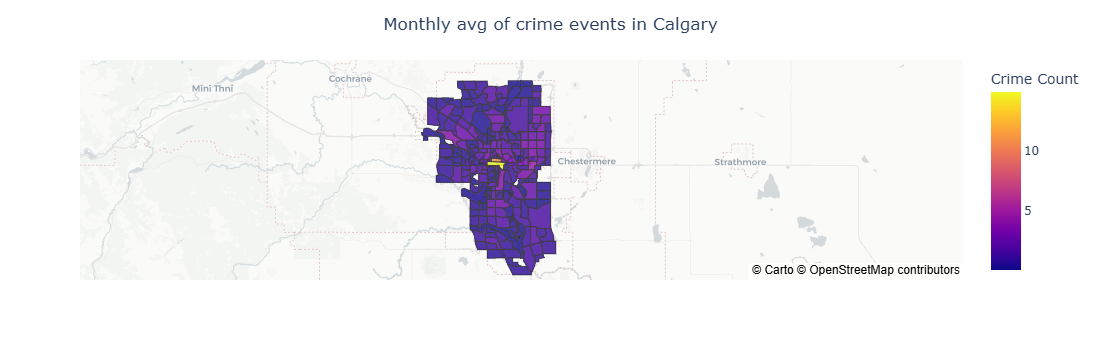

In [539]:
fig1=px.choropleth_mapbox(df_crime_month_avg, 
                   locations='id',
                   geojson=Calgary,
                   color='Crime Count',
                  hover_name='Community',
                  hover_data=['Crime Count'],
                         mapbox_style="carto-positron",
                         center={'lat':51.03,'lon':-114},
                         zoom=8,opacity=0.8)
fig1.update_geos(fitbounds="locations",visible=False)

#Adding the title
fig1.update_layout(title_text="Monthly avg of crime events in Calgary", title_x=0.5)
fig1.show()